# Lending Club Predict Interest Rates


## Preprocessing and Training Data Development

Preprocessing plays a crucial role in preparing data for fitting a regression model. It involves transforming and 
manipulating the data to ensure it is in a suitable format and meets the requirements of the regression algorithm. 
We will take the following preprocessing steps for our regression modeling:
    
1. Feature scaling: Scale numerical features to ensure they are on a similar scale.
    Scaling can prevent certain features from dominating the regression model due to their larger magnitude.

2. Encoding categorical variables: we will convert categorical variables into a numerical representation that can be 
    understood by the regression model. We will us one-hot encoding technique to create binary dummy variables.
    label encoding (assigning numerical labels), or using entity embeddings for high-cardinality categorical variables.

3. Feature selection: we will identify the most relevant features that have a strong relationship with the target variable. 
  Feature selection techniques, such as correlation analysis, stepwise regression, or regularization methods 
    like Lasso or Ridge regression, can help in selecting the most informative features and removing irrelevant 
    or redundant ones.
4. Splitting the data: lastly, we will divide the dataset into training and test sets. The training set is used to 
    train the regression model, while the test set is used to evaluate its performance on unseen data. 
    This step helps assess the model's generalization ability.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer


import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor


from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn import preprocessing
import scipy.stats as stats

from tabulate import tabulate




In [2]:
import warnings

# Use the warnings module to suppress specific warnings
warnings.filterwarnings("ignore")

In [3]:
#load the data
loan_df = pd.read_csv('../lc_loanDf.csv')

In [4]:
loan_df.shape

(817103, 53)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817103 entries, 0 to 817102
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           817103 non-null  int64  
 1   loan_amnt                    817103 non-null  float64
 2   funded_amnt                  817103 non-null  float64
 3   funded_amnt_inv              817103 non-null  float64
 4   term                         817103 non-null  object 
 5   int_rate                     817103 non-null  float64
 6   installment                  817103 non-null  float64
 7   grade                        817103 non-null  object 
 8   sub_grade                    817103 non-null  object 
 9   emp_title                    817103 non-null  object 
 10  emp_length                   817103 non-null  int64  
 11  home_ownership               817103 non-null  object 
 12  annual_inc                   817103 non-null  float64
 13 

To determine which columns are relevant for predicting interest rate, we used domain knowledge. 
Here is the general analysis of the columns and  their potential relevance for predicting interest rates:

    'int_rate': This column represents the target variable, the interest rate. It is the variable you want to predict, and therefore, it is directly relevant to the prediction task.

    'loan_amnt': The loan amount can potentially have an impact on the interest rate. Higher loan amounts might be associated with higher interest rates due to increased risk. Therefore, 'loan_amnt' can be considered relevant for predicting interest rates.

    'annual_inc': Borrower's annual income is an important factor that lenders consider when determining interest rates. Higher incomes may indicate a borrower's ability to handle debt, and lower incomes may result in higher interest rates. Therefore, 'annual_inc' can be relevant for predicting interest rates.

    'mths_since_last_delinq': This column represents the number of months since the borrower's last delinquency. Delinquencies may affect creditworthiness, which can impact interest rates. Therefore, 'mths_since_last_delinq' can potentially be relevant in predicting interest rates.

    'revol_bal' and 'revol_util': These columns are related to the borrower's revolving credit balance and utilization. Higher revolving balances and higher utilization may indicate a higher risk for lenders, potentially leading to higher interest rates. Thus, 'revol_bal' and 'revol_util' can be relevant features for predicting interest rates.

    'tot_coll_amt' and 'tot_cur_bal': These columns represent the total collection amount and the total current balance, respectively. These variables provide information about the borrower's credit history and their current financial situation. Both variables can be relevant for predicting interest rates as they reflect creditworthiness and financial stability.

    'total_rev_hi_lim': This column represents the total revolving credit limit. It provides information about the borrower's available credit and potential debt capacity. Higher credit limits might suggest a better credit profile, which can influence interest rates. Thus, 'total_rev_hi_lim' can be relevant in predicting interest rates.

    'term_in_month': This column indicates the loan term in months. Loan terms can affect interest rates, as longer terms may carry higher risks and potentially higher interest rates. Therefore, 'term_in_month' can be relevant for predicting interest rates.
    'empl length':The length of employment can be an indicator of job stability. Lenders may consider borrowers with longer employment histories as more financially secure and reliable, potentially resulting in lower interest rates. Conversely, borrowers with shorter employment histories may be perceived as higher risk, leading to higher interest rates.



In [6]:
relevant_cols=['int_rate','loan_amnt','annual_inc','mths_since_last_delinq','revol_bal', 'revol_util',
               'tot_coll_amt','tot_cur_bal','total_rev_hi_lim','term_in_month', 'emp_length']

In [7]:
loan_Df=loan_df[relevant_cols]

In [8]:
loan_Df.shape

(817103, 11)

In [9]:
# we will randomly sample only 6% of our dataframe to reduce the size of the dataset

# randomly sample 6% of the dataframe
sampled_df = loan_Df.sample(frac=0.06, random_state=42)  # Set random_state for reproducibility


In [10]:
sampled_df.shape

(49026, 11)

In [11]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49026 entries, 468868 to 724028
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   int_rate                49026 non-null  float64
 1   loan_amnt               49026 non-null  float64
 2   annual_inc              49026 non-null  float64
 3   mths_since_last_delinq  49026 non-null  int64  
 4   revol_bal               49026 non-null  float64
 5   revol_util              49026 non-null  float64
 6   tot_coll_amt            49026 non-null  float64
 7   tot_cur_bal             49026 non-null  float64
 8   total_rev_hi_lim        49026 non-null  float64
 9   term_in_month           49026 non-null  int64  
 10  emp_length              49026 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 4.5 MB


# Split data into training and testing subsets

In [12]:
#Split data into train and test set

# Define the features and target variable
X = sampled_df.drop('int_rate', axis=1) # all columns except the target
y = sampled_df['int_rate'] # target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modeling

A dummy baseline model is a simple baseline model used in regression tasks to establish a benchmark for performance comparison with more complex models. It provides a basic reference point against which the performance of other models can be evaluated.

By using a dummy baseline model that predicts the mean of the target variable, we can compare the performance of more sophisticated regression models against this simple baseline. If our more advanced models cannot outperform the dummy baseline, it indicates that there may be issues with our feature engineering, data quality, or the complexity of the problem itself.

# Dummy Regressor

In [13]:
# Create and fit the dummy regressor using the mean strategy
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)

# Make predictions using the dummy model
y_pred = dummy_regressor.predict(X_train)

# Evaluate the performance of the dummy model
dummy_mse = mean_squared_error(y_train, y_pred)
dummy_mae = mean_absolute_error(y_train, y_pred)
dummy_r2 = r2_score(y_train, y_pred)


metrics_data = [
    ["Mean Squared Error (Dummy Baseline)", dummy_mse ],
    ["Mean Absolute Error (Dummy Baseline)",dummy_mae],
    ["R^2 Score (Dummy Baseline)", dummy_r2]
]

table = tabulate(metrics_data, headers=["Metric", "Value"], tablefmt="grid")
print(table)


+--------------------------------------+---------+
| Metric                               |   Value |
+======================================+=========+
| Mean Squared Error (Dummy Baseline)  | 19.5506 |
+--------------------------------------+---------+
| Mean Absolute Error (Dummy Baseline) |  3.5397 |
+--------------------------------------+---------+
| R^2 Score (Dummy Baseline)           |  0      |
+--------------------------------------+---------+


# Build Model: 
## Ridge, Random Forest  and XGBRegressor 


In [14]:
#create three separate regression models: ridge_model, rf_model, and xgbr_model

ridge_model=Ridge(alpha=1.0, random_state=1)

rf_model=RandomForestRegressor()

xgbr_model=XGBRegressor()

In [15]:
#fit the three regression models

ridge_model.fit(X_train, y_train)

rf_model.fit(X_train, y_train)

xgbr_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
# Predict on the test set
ridge_pred = ridge_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgbr_pred = xgbr_model.predict(X_test)

# Calculate metrics for each model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

xgbr_mse = mean_squared_error(y_test, xgbr_pred)
xgbr_mae = mean_absolute_error(y_test, xgbr_pred)
xgbr_r2 = r2_score(y_test, xgbr_pred)

# Create a table with the model metrics
table = [
    ["Model", "MSE", "MAE", "R^2"],
    ["Dummy Baseline", dummy_mse, dummy_mae, dummy_r2],
    ["Ridge", ridge_mse, ridge_mae, ridge_r2],
    ["Random Forest", rf_mse, rf_mae, rf_r2],
    ["XGBoost", xgbr_mse, xgbr_mae, xgbr_r2]
]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="grid"))


+----------------+---------+---------+----------+
| Model          |     MSE |     MAE |      R^2 |
+================+=========+=========+==========+
| Dummy Baseline | 19.5506 | 3.5397  | 0        |
+----------------+---------+---------+----------+
| Ridge          | 14.2707 | 3.03048 | 0.26332  |
+----------------+---------+---------+----------+
| Random Forest  | 12.6979 | 2.83601 | 0.344512 |
+----------------+---------+---------+----------+
| XGBoost        | 12.2303 | 2.77868 | 0.368651 |
+----------------+---------+---------+----------+


Based on the result above the XGBoost performs better with MSE value of 12.23 and MAE of 2.7. It's R value shows a better fit
in comparison to the other models.

All three models have performed better than the dummy regressor. But overall, the XGBoost has performed better than all models.

There is still lots of room for improvement.

Next, we will perform a hyperparameter search for the RandomForestRegressor model using RandomizedSearchCV.

We will use the following steps to create pipeline:
1. OrdinalEncoder: This step is used for encoding categorical variables that have an ordinal relationship. 
    It assigns unique integer values to different categories. It is often used when the categorical variables have a 
    meaningful order, such as "low," "medium," and "high."

2. SimpleImputer: This step is used to impute missing values in the dataset. It replaces the missing values with a 
    specified strategy, such as the mean, median, or most frequent value of the column. It helps handle missing data 
    before feeding it into the model.

3. RandomForestRegressor: This step represents the model used in the pipeline. It utilizes the random forest algorithm for 
    regression tasks. 
    
    Its configuration is: 
    random_state=42 parameter to ensure reproducibility of results, 
    n_jobs=1 to limit the number of CPU cores used for training, 
    max_samples=0.6 to specify that each decision tree in the random forest should use a maximum of 60% of the training samples.

# Random Forest Model: RandomizedSearchCV and Cross Validation

In [17]:
from sklearn.pipeline import make_pipeline

# Create the pipeline
clf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state=42, n_jobs=1, max_samples=0.6)
)


In [18]:
parm_Grid = {
    'simpleimputer__strategy': ['median', 'mean'],
    'randomforestregressor__max_depth': range(5, 60, 5),
    'randomforestregressor__n_estimators': range(25, 200, 25)
}


In [19]:
from sklearn.model_selection import RandomizedSearchCV

models_rfrs = RandomizedSearchCV(
    clf,
    param_distributions=parm_Grid,
    n_iter=15,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)


In [20]:
# Fit the RandomizedSearchCV object on the training data:
models_rfrs.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(max_samples=0.6,
                                                                    n_jobs=1,
                                                                    random_state=42))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'randomforestregressor__max_depth': range(5, 60, 5),
                                        'randomforestregressor__n_estimators': range(25, 200, 25),
                                        'simpleimputer__strategy': ['median',
                                                                    'mean']},
                   random_state=42, verbose=1)

Access the best parameters found during the search. Best_params will contain the best set of hyperparameters found by the randomized search. We can use these parameters to instantiate a new RandomForestRegressor model with the optimized configuration.

In [21]:
best_params = models_rfrs.best_params_
print("Best Hyper Parameters for Random Forest:", best_params)

Best Hyper Parameters for Random Forest: {'simpleimputer__strategy': 'mean', 'randomforestregressor__n_estimators': 25, 'randomforestregressor__max_depth': 10}


# XGBRegressor model : RandomizedSearchCV and Cross Validation

In [22]:
# Create the pipeline
clf_1 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBRegressor(random_state=42, n_jobs=1, max_samples=0.6)
)
parm_Grid = {
    'simpleimputer__strategy': ['median', 'mean'],
    'xgbregressor__max_depth': range(5, 60, 5),
    'xgbregressor__n_estimators': range(25, 200, 25)
}
model_xgbrs = RandomizedSearchCV(
    clf_1,
    param_distributions=parm_Grid,
    n_iter=15,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [23]:
model_xgbrs.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[05:36:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_samples" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           e

In [24]:
#the the best hyper parameters for XGBRegressor model
best_params = model_xgbrs.best_params_
print("Best Hyper Parameters for XGBoost:", best_params)

Best Hyper Parameters for XGBoost: {'xgbregressor__n_estimators': 50, 'xgbregressor__max_depth': 15, 'simpleimputer__strategy': 'median'}


# Finalize model

In [25]:
#final rf model with new parameters
#Best Parameters: {'simpleimputer__strategy': 'mean', 'randomforestregressor__n_estimators': 25, 
#'randomforestregressor__max_depth': 10}

model_rf_final = make_pipeline(
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(random_state=42, n_jobs=1, max_samples=0.6, max_depth=10, n_estimators=25)
)


In [26]:
#final xgbr model with new parameters
#Best Parameters: {'xgbregressor__n_estimators': 50, 'xgbregressor__max_depth': 15, 'simpleimputer__strategy': 'median'}

model_xgbr_final=make_pipeline(    
    SimpleImputer(strategy='median'),
    XGBRegressor(random_state=42, n_jobs=1, max_samples=0.6,max_depth=15, n_estimators=50 ))

In [27]:
#Fit the final models
model_rf_final.fit(X_train, y_train)



Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, max_samples=0.6,
                                       n_estimators=25, n_jobs=1,
                                       random_state=42))])

In [28]:
model_xgbr_final.fit(X_train, y_train)

[05:36:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_samples" } are not used.



Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=15, max_leaves=None, max_samples=0.6,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=50,
   

In [29]:
from tabulate import tabulate

models = [
    ("Dummy Baseline", dummy_regressor),
    ("Ridge", ridge_model),
    ("Random Forest Regression", model_rf_final),
    ("XGBoost", model_xgbr_final)
]

results = []
headers = ["Model", "Training MAE", "Test MAE", "Training MSE", "Test MSE", "R2 Score"]

for model_name, model in models:
    training_mae = mean_absolute_error(y_train, model.predict(X_train))
    test_mae = mean_absolute_error(y_test, model.predict(X_test))
    training_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    r2_score = model.score(X_test, y_test)
   
    results.append([model_name, training_mae, test_mae, training_mse, test_mse, r2_score])

table = tabulate(results, headers=headers, tablefmt="grid")
print(table)


+--------------------------+----------------+------------+----------------+------------+--------------+
| Model                    |   Training MAE |   Test MAE |   Training MSE |   Test MSE |     R2 Score |
+==========================+================+============+================+============+==============+
| Dummy Baseline           |       3.5397   |    3.52519 |       19.5506  |    19.3719 | -9.95624e-06 |
+--------------------------+----------------+------------+----------------+------------+--------------+
| Ridge                    |       3.04803  |    3.03048 |       14.5239  |    14.2707 |  0.26332     |
+--------------------------+----------------+------------+----------------+------------+--------------+
| Random Forest Regression |       2.58382  |    2.81333 |       10.465   |    12.4642 |  0.356577    |
+--------------------------+----------------+------------+----------------+------------+--------------+
| XGBoost                  |       0.582531 |    2.96478 |      

Based on the results provided, the XGBoost model has the lowest training MAE (0.582531) and the lowest training MSE (0.78251), indicating that it performs better in terms of capturing the training data's error. However, it has a higher test MAE (2.96478) and test MSE (14.0727) compared to the other models, suggesting that it may be overfitting the training data.

On the other hand, the Random Forest Regression model has relatively balanced performance between training and test sets, with lower test MAE (2.81333) and test MSE (12.4642) compared to the XGBoost model. It also has a higher R2 score (0.356577) compared to the other models, indicating better overall performance in capturing the variance in the target variable.

Therefore, based on the provided metrics, the Random Forest Regression model is considered a better model among the three options. 

# Feature Importance

## Feature Importance: RandomForestRegressor model

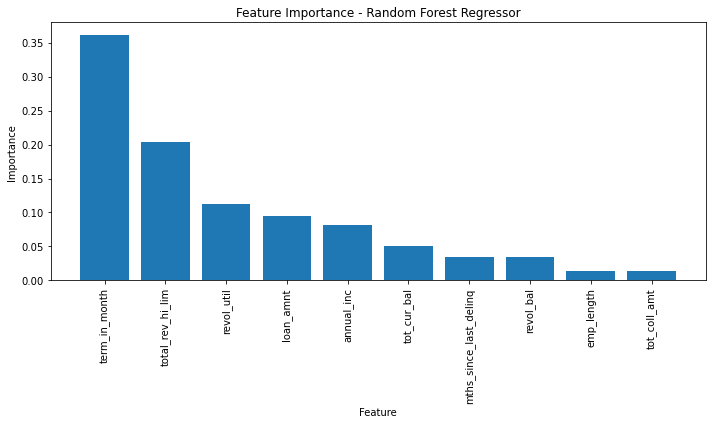

In [30]:
# Get feature importances
importances = model_rf_final.named_steps['randomforestregressor'].feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort indices based on feature importance
indices = np.argsort(importances)[::-1]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest Regressor')
plt.tight_layout()
plt.show()

## Feature Importance: XgbRegressor model

Next, we will visualize the feature importance using a graph for the XGBRegressor model 

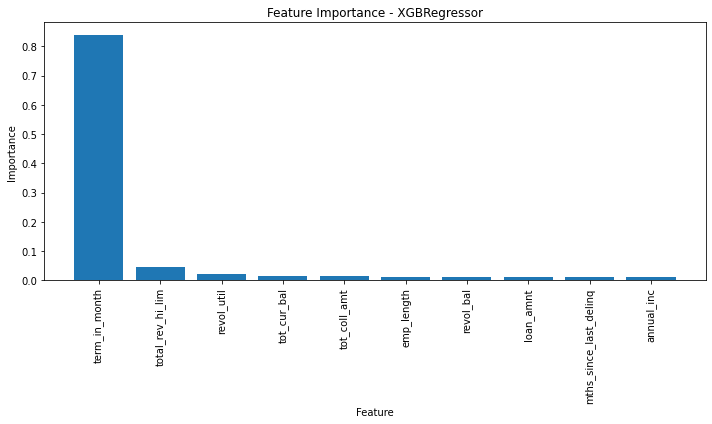

In [31]:
# Get feature importances
importances = model_xgbr_final.named_steps['xgbregressor'].feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort indices based on feature importance
indices = np.argsort(importances)[::-1]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBRegressor')
plt.tight_layout()
plt.show()

# Create a model metrics file

In [37]:
models = [
    ("Dummy Baseline", dummy_regressor,{}),
    ("Ridge", ridge_model, {'alpha': ridge_model.alpha}),
    ("Random Forest Regression", model_rf_final, {'max_depth': model_rf_final['randomforestregressor'].max_depth, 'n_estimators': model_rf_final['randomforestregressor'].n_estimators}),
    ("XGBoost", model_xgbr_final, {'max_depth': model_xgbr_final['xgbregressor'].max_depth, 'n_estimators': model_xgbr_final['xgbregressor'].n_estimators})
]

metrics = []
for model_name, model, hyperparameters in models:
    training_mae = mean_absolute_error(y_train, model.predict(X_train))
    test_mae = mean_absolute_error(y_test, model.predict(X_test))
    training_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    r2_score = model.score(X_test, y_test)
    features = list(X_train.columns)
    parameters = model.get_params()
    metrics.append((model_name, features, parameters, hyperparameters, training_mae, test_mae, training_mse, test_mse, r2_score))

metrics_df = pd.DataFrame(metrics, columns=['Model', 'Features', 'Parameters', 'Hyperparameters', 'Training MAE', 'Test MAE', 'Training MSE', 'Test MSE', 'R2 Score'])
metrics_df.to_csv('model_metrics.csv', index=False)


